In [2]:
#from datasets.StormDamageDataset import StormDamageDataset
from datasets.ClusteredStormDamageDataset import ClusteredStormDamageDataset
import torch
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.stats import pointbiserialr
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
dataset = StormDamageDataset('../../Ressources/aggregated_main_data.csv','../../Ressources/weather_data4',
                             7, '2018-01-01', '2019-01-01',
                             '2020-01-01','../../Ressources/municipalities_coordinates_newest.csv')

In [4]:
train_dataset = ClusteredStormDamageDataset('../../Ressources/main_data_1972_2023.csv',
                                    '../../Ressources/weather_data4',
                                    '../../Ressources/municipalities_coordinates_newest.csv',
                                            n_clusters=6,
                                            n_sequences=1, test_years=10,
                                            grouping_calendar='weekly', split='train',
                                            damage_weights={0: 0, 1: 0.06, 2: 0.8, 3: 11.3})
test_dataset = ClusteredStormDamageDataset('../../Ressources/main_data_1972_2023.csv',
                                    '../../Ressources/weather_data4',
                                    '../../Ressources/municipalities_coordinates_newest.csv',
                                           n_clusters=6,
                                           n_sequences=1, test_years=10,
                                           grouping_calendar='weekly', split='test',
                                           damage_weights={0: 0, 1: 0.06, 2: 0.8, 3: 11.3})

low threshold: 4.000000000000002
mid thresh: 15.702195524999984
low threshold: 4.000000000000002
mid thresh: 15.702195524999984


In [5]:
X, y = [], []
for feat, lbl in train_dataset:
    cur = feat[0].numpy()
    prev = feat[1].numpy()
    vec = np.concatenate([cur, prev])
    X.append(vec)
    y.append(1 if lbl.item() > 0 else 0)
X   = np.vstack(X)
y   = np.array(y)

added padding
added padding
added padding
added padding
added padding
added padding


In [6]:
X_test, y_test =[],[]
for feat, lbl in train_dataset:
    cur = feat[0].numpy()
    prev = feat[1].numpy()
    vec = np.concatenate([cur, prev])
    X_test.append(vec)
    y_test.append(1 if lbl.item() > 0 else 0)
X_test = np.vstack(X)
y_test = np.array(y)

added padding
added padding
added padding
added padding
added padding
added padding


In [114]:
len(dataset)

16536

In [119]:
# temperature_2m_mean, sunshine_duration, rain_sum, snowfall_sum, date_sin, date_cos, lat, long
dataset.__getitem__(324)

(tensor([-1.6627e+00, -1.5713e+00, -1.7270e+00, -1.9489e+00, -1.6927e+00,
         -1.5098e+00, -1.3650e+00, -1.6529e-01, -8.0686e-01, -7.7630e-01,
         -1.4482e-01, -1.1327e-01, -3.0746e-02, -3.0174e-01, -4.8039e-01,
         -4.7180e-01, -4.4763e-01, -5.3849e-01, -4.3816e-01, -4.1636e-01,
         -4.2597e-01, -2.9966e-01, -2.8555e-01, -2.2236e-01, -2.7473e-01,
         -1.7934e-01, -2.6199e-01, -1.9716e-01, -2.0411e-17,  8.3333e-02,
          7.0030e-01,  3.3131e-01]),
 tensor(0))

In [120]:
f, l = dataset.__getitem__(0)
f[0:7].mean()

tensor(-0.3718)

In [123]:
temperature_2m_mean = []
sunshine_duration = []
rain_sum = []
snowfall_sum = []
sin_date = []
cos_date = []
lat = []
long = []
labels = []

for i in range(len(dataset)):
    features, label = dataset[i]

    temperature_2m_mean.append(features[0:7].mean().item())
    sunshine_duration.append(features[7:13].mean().item())
    rain_sum.append(features[13:19].mean().item())
    snowfall_sum.append(features[19:25].mean().item())

    sin_date.append(features[25].item())
    cos_date.append(features[26].item())
    lat.append(features[27].item())
    long.append(features[28].item())

    labels.append(label.item())


In [157]:
np.unique(labels, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  54,  55,  57,  59,  60,  61,  62,  64,  65,  66,  67,  70,
         71,  72,  73,  74,  77,  78,  80,  82,  83,  84,  85,  87,  91,
         93,  94, 105, 111, 118, 124, 125, 133, 147, 153, 175, 179, 198,
        206, 222, 229, 237, 258, 263, 271, 281, 302]),
 array([12735,  1797,   529,   274,   193,   124,    91,    67,    67,
           71,    63,    41,    36,    33,    22,    25,    18,    27,
           15,    18,    16,    15,    15,    16,    12,    13,     8,
           10,    11,    11,     7,     5,     9,     3,     4,     5,
            5,     3,     5,     8,     2,    10,     6,     4,     7,
            1,     3,     1,     3,     2,     2,     3,     1,     1,
        

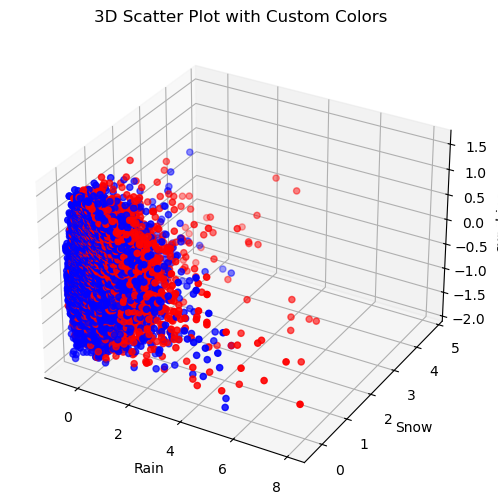

In [171]:
# Create figure and 3D axis
colors = ['red' if label != 0 else 'blue' for label in labels]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(rain_sum,snowfall_sum, sunshine_duration , c=colors)

# Labels
ax.set_xlabel('Rain')
ax.set_ylabel('Snow')
ax.set_zlabel('sunshine')

ax.set_title('3D Scatter Plot with Custom Colors')

plt.show()


In [127]:
bi_labels =  [0 if labels[i] == 0 else 1 for i in range(len(labels))]

corr_temp, _ = pointbiserialr(bi_labels, temperature_2m_mean)
corr_sun, _ = pointbiserialr(bi_labels, snowfall_sum)
corr_rain, _ = pointbiserialr(bi_labels, rain_sum)
corr_snow, _ = pointbiserialr(bi_labels, snowfall_sum)

print(f"Correlation with temperature: {corr_temp:.3f}")
print(f"Correlation with sunshine:   {corr_sun:.3f}")
print(f"Correlation with rain:       {corr_rain:.3f}")
print(f"correlation with snow: {corr_snow}")

Correlation with temperature: 0.224
Correlation with sunshine:   0.130
Correlation with rain:       0.277
correlation with snow: 0.12968816478751513


In [161]:
X = np.column_stack([temperature_2m_mean, snowfall_sum, rain_sum, sunshine_duration, sin_date, cos_date])
X_train, X_test, y_train, y_test = train_test_split(
    X, bi_labels, test_size=0.2, random_state=42)

In [162]:
X_train[1].shape

(6,)

In [8]:
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.87      0.63      0.73     10274
           1       0.33      0.65      0.44      2872

    accuracy                           0.64     13146
   macro avg       0.60      0.64      0.59     13146
weighted avg       0.75      0.64      0.67     13146



/opt/homebrew/anaconda3/envs/stormmind/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)
# Predict
y_pred = rf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10274
           1       1.00      1.00      1.00      2872

    accuracy                           1.00     13146
   macro avg       1.00      1.00      1.00     13146
weighted avg       1.00      1.00      1.00     13146



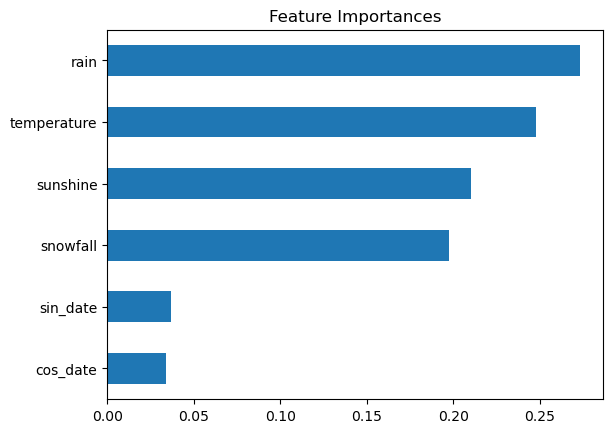

In [167]:
features = ['temperature', 'snowfall', 'rain', 'sunshine', 'sin_date', 'cos_date']
importances = rf.feature_importances_

pd.Series(importances, index=features).sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()

In [168]:

# Count positive and negative samples
pos_weight = (len(y_train) - np.sum(y_train)) / np.sum(y_train)
pos_weight = torch.tensor([pos_weight], dtype=torch.float32)


In [169]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

class WeatherDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class SimpleSeq2One(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(SimpleSeq2One, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        # Take only the last time step's output
        out = out[:, -1, :]
        out = self.fc(out)
        return out


In [170]:
# Example config
input_dim = 6       # temp, sun, rain
hidden_dim = 64
num_layers = 5
output_dim = 1      # Binary classification
batch_size = 32
epochs = 10

model = SimpleSeq2One(input_dim, hidden_dim, num_layers, output_dim)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Create dataloaders
train_dataset = WeatherDataset(X_train[:, :6], y_train)
train_loader = DataLoader(train_dataset, shuffle=True)

# Train loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze(dim=1)

        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 12734.9518
Epoch 2, Loss: 12547.1748
Epoch 3, Loss: 12511.1580
Epoch 4, Loss: 12456.2432
Epoch 5, Loss: 12418.2991
Epoch 6, Loss: 12411.1433
Epoch 7, Loss: 12378.9456
Epoch 8, Loss: 12408.0548
Epoch 9, Loss: 12330.8511
Epoch 10, Loss: 12365.0604


In [172]:
test_dataset = WeatherDataset(X_test[:, :6], y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [173]:
from sklearn.metrics import f1_score, recall_score, precision_score
def validate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            preds = torch.sigmoid(outputs) >= 0.5
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)

    accuracy = 100 * (all_preds == all_labels).sum().item() / len(all_labels)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    avg_loss = running_loss / len(dataloader)

    return avg_loss, accuracy, precision, recall, f1, all_labels, all_preds


In [174]:
val_loss, accuracy, precision, recall, f1, all_labels, all_preds = validate(model, test_loader, criterion)
print(f"Validation Loss: {val_loss:.4f} | Acc: {accuracy:.2f}% | Prec: {precision:.2f} | Rec: {recall:.2f} | F1: {f1:.2f}")


Validation Loss: 0.9588 | Acc: 71.01% | Prec: 0.75 | Rec: 0.71 | F1: 0.72
